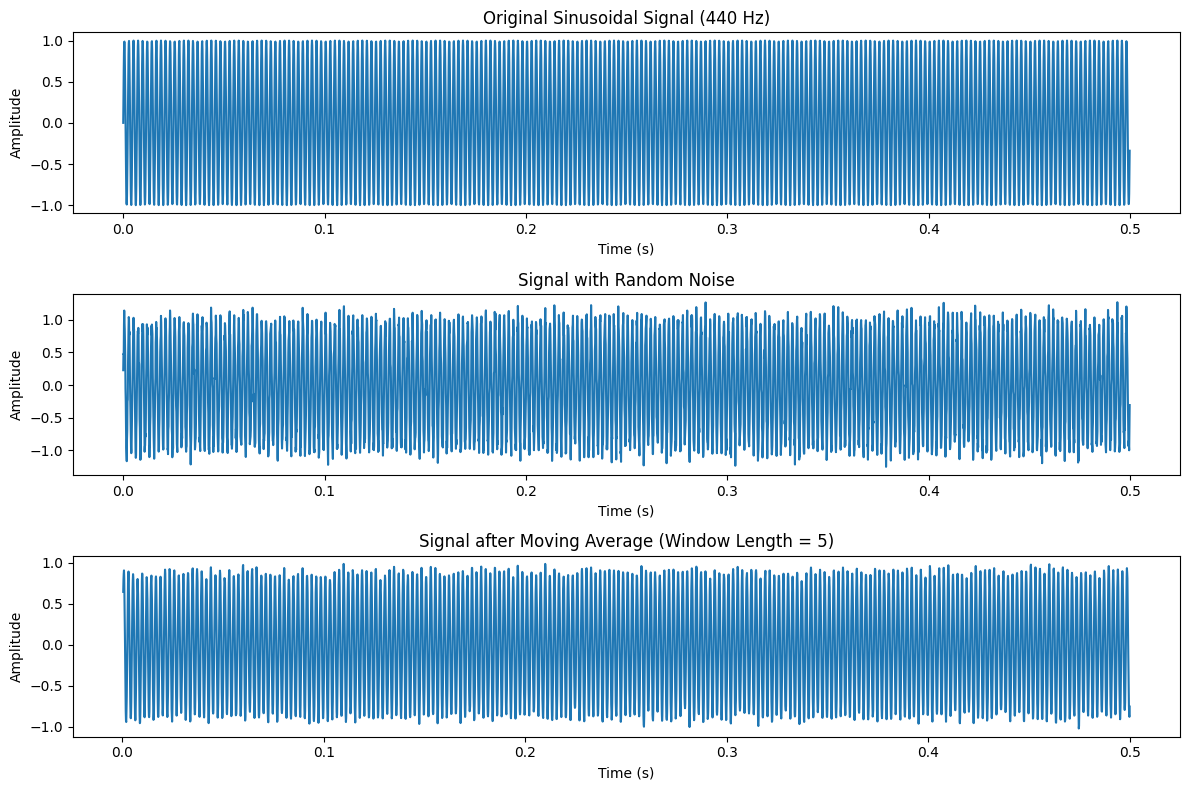

As noise strength increases, the sinusoidal signal becomes less distinguishable, with more random fluctuations obscuring the original waveform.
As the window length increases, the averaged signal becomes smoother, reducing noise but also potentially distorting the original signal's high-frequency components, leading to a more damped and delayed response.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 8000  # Sampling frequency in Hz
f = 440    # Signal frequency in Hz
duration = 0.5  # Duration in seconds
L = 5      # Window length for moving average

# Time vector
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Sinusoidal signal
x = np.sin(2 * np.pi * f * t)

# Add random noise
noise_strength = 0.1  # Adjust this value to change noise strength
noise = noise_strength * np.random.normal(0, 1, len(x))
x_noisy = x + noise

# Moving average function
def moving_average(x, window_size):
    return np.convolve(x, np.ones(window_size)/window_size, mode='valid')

# Apply moving average
y = moving_average(x_noisy, L)

plt.figure(figsize=(12, 8))

# Original signal
plt.subplot(3, 1, 1)
plt.plot(t[:len(x)], x)
plt.title('Original Sinusoidal Signal (440 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Noisy signal
plt.subplot(3, 1, 2)
plt.plot(t[:len(x_noisy)], x_noisy)
plt.title('Signal with Random Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Averaged signal
t_avg = t[L-1:len(y)+L-1]  # Adjust time vector for convolution
plt.subplot(3, 1, 3)
plt.plot(t_avg, y)
plt.title('Signal after Moving Average (Window Length = 5)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Description of signal as noise strength increases
print("As noise strength increases, the sinusoidal signal becomes less distinguishable, with more random fluctuations obscuring the original waveform.")

# Description of averaged signal as window length increases
print("As the window length increases, the averaged signal becomes smoother, reducing noise but also potentially distorting the original signal's high-frequency components, leading to a more damped and delayed response.")